<a href="https://colab.research.google.com/github/ChilukalaMahenderReddy/python_libraries/blob/main/Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#mounting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
#importing the data from the drive
import pandas as pd
data = pd.read_csv('drive/MyDrive/Iris.csv')

SHAP is a mathematical method to explain the predictions of machine learning models. It is based on the concepts of game theory and can be used to explain the predictions of any machine learning model by calculating the contribution of each feature to the prediction. SHAP can determine the most important features and their influence on the model prediction. SHAP is a mathematical topic and cannot be fully understood without explaining the math behind it.

Some models in machine learning like linear regression or decision trees are interpretable. Here interpretability refers to how easy it is for humans to understand the processes the model uses to make a prediction. For example, if we plot a decision tree classifier, we can easily understand how it makes a certain prediction. On the other hand, deep learning models are like a black box, and we cannot easily understand how these modes make a prediction. SHAP is an individualized model-agnostic explainer. A model-agnostic method assumes that the model to be explained is a black box and doesn’t know how the model internally works. So the model-agnostic method can only access the input data and the prediction of the model to be explained. An individualized model-agnostic explainer is an interpretable model itself.

In [60]:
#!pip install shap
import shap

In [61]:
#By using LabelEncoder we can convert catrgorical values into numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [62]:
#splitting the data into independent(X) and dependent(y) sets
X= data.drop(['Species'],axis=1)
y=data['Species']

In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [64]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [65]:
#splitting the data into training and testing sets with the help of train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [66]:
X_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,138,6.4,3.1,5.5,1.8
84,85,5.4,3.0,4.5,1.5
27,28,5.2,3.5,1.5,0.2
127,128,6.1,3.0,4.9,1.8
132,133,6.4,2.8,5.6,2.2
...,...,...,...,...,...
9,10,4.9,3.1,1.5,0.1
103,104,6.3,2.9,5.6,1.8
67,68,5.8,2.7,4.1,1.0
117,118,7.7,3.8,6.7,2.2


In [67]:
#importing and fitting the model by using Support Vector Classifier(SVC)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [68]:
#the SHAP tool for explaining the prediction in the test set using visualization.
#Explaining the prediction using an explainer
explainer = shap.KernelExplainer(svc.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

X does not have valid feature names, but SVC was fitted with feature names
Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

Here we have used the force plot to plot outcomes from the model. By visualizing the force plot we can understand the impact of every feature on the prediction by the model even for a specific instance of the data. 

 The Force plot shows the influence of each feature on the current prediction. Values in the blue colour can be considered as the values that have a positive influence on the prediction whereas values in the red colour have a negative influence on the prediction.

In [72]:
#Plotting the prediction
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
X50 = shap.utils.sample(X, 50)
explainer = shap.Explainer(model.predict, X50)
shap_values = explainer(X)

**Partial Dependence Plots**

The importance of the feature can be found by knowing the impact of the feature on the output or by knowing the distribution of the feature. So if we can plot the model and the distribution in a single plot, it would become more beneficial and informative.

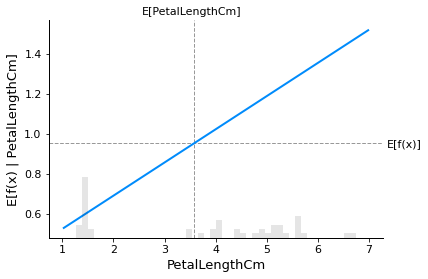

In [40]:
shap.plots.partial_dependence('PetalLengthCm', model.predict, X50, ice=False, model_expected_value=True, feature_expected_value=True)

These SHAP values of all input features will always be summed up to the difference between the expected output from the model and that is how the output from the current model for the prediction becomes explained.

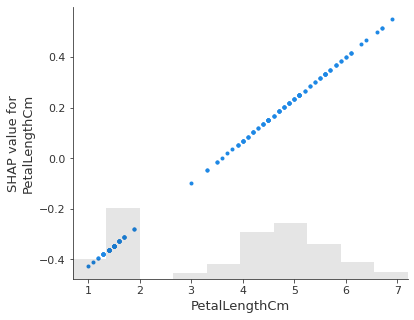

In [48]:
shap.plots.scatter(shap_values[:,3])

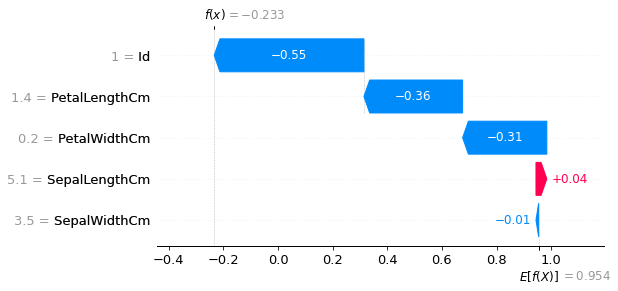

In [52]:
shap.plots.waterfall(shap_values[0])



In [82]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [84]:
# visualize the first prediction's explaination with default colors
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [86]:
# visualize the first prediction's explaination with a Pink and Yellow Green color map.
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], plot_cmap="PkYg")

In [88]:
# visualize the first 5 predictions explanations with a dark red dark blue color map.
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:5,:], X.iloc[0:5,:], plot_cmap="DrDb")